In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

churn_data_copy = churn_data.copy()


/tmp/ipykernel_39546/3661243044.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


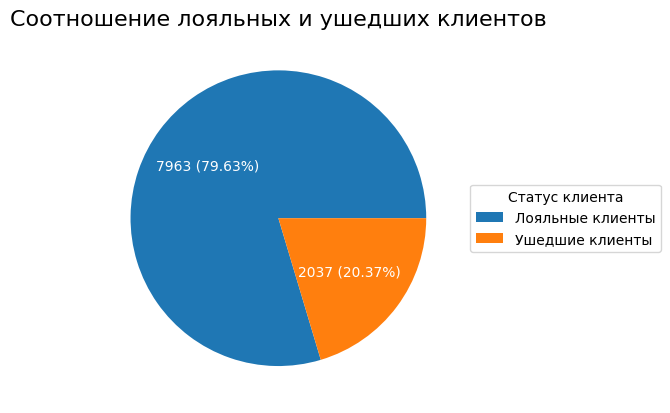

In [2]:
fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(churn_data_copy.groupby(by='Exited')['Exited'].count(), autopct=lambda pcnt: str(round(pcnt * churn_data_copy.shape[0] / 100)) + " (" + str(round(pcnt, 2)) + "%)", textprops=dict(color="w"))
ax.legend(wedges, ["Лояльные клиенты", "Ушедшие клиенты"], title="Статус клиента", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Соотношение лояльных и ушедших клиентов", fontsize=16)
plt.show()

Из диаграммы видно, что большая часть клиентов банка являются лояльными (79.63%), в то время как ушедшие клиенты составляют меньшинство (20.37%). Общее количество клиентов составляет 10 000

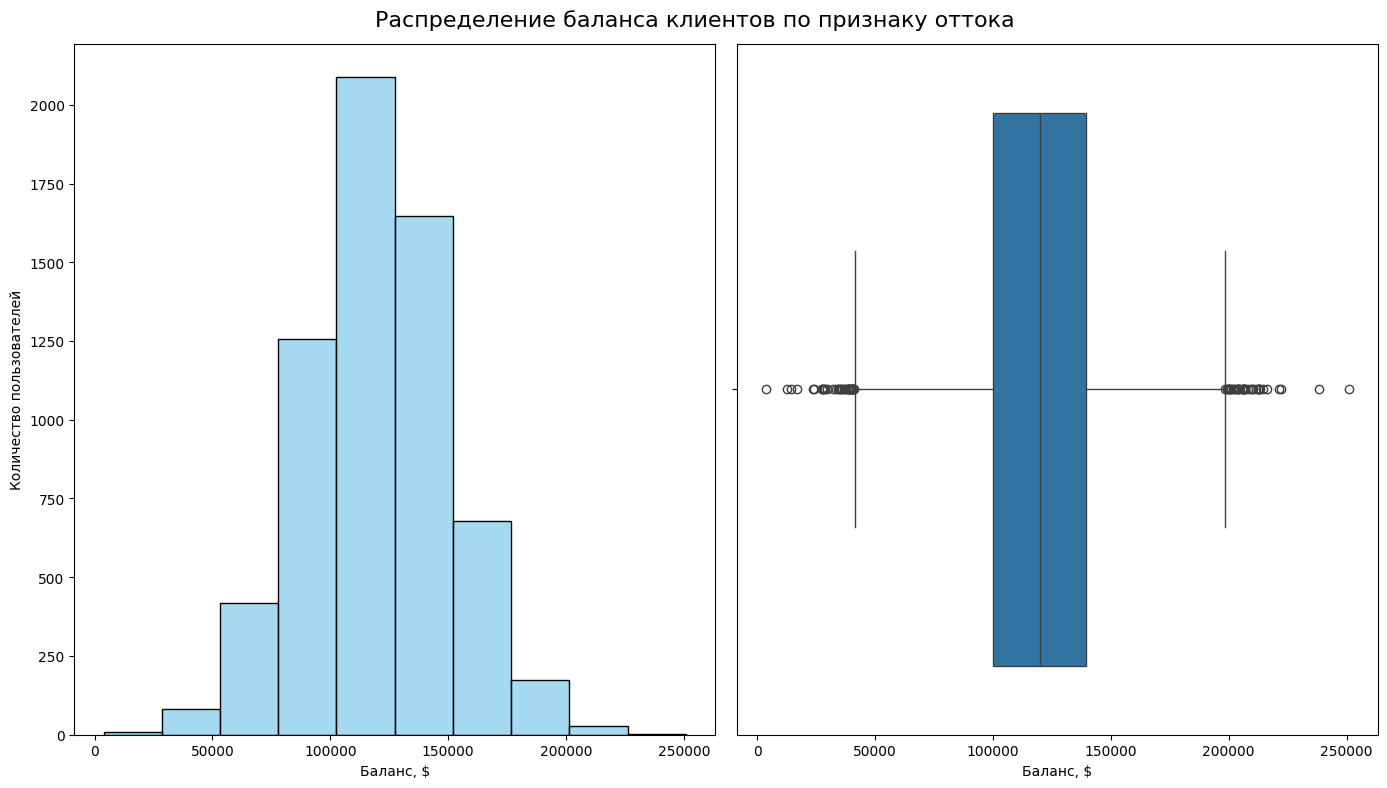

In [3]:

filtered = churn_data_copy[churn_data_copy['Balance'] > 2500]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

ax1 = sns.histplot(filtered['Balance'], bins=10, color='skyblue', ax=ax1)
ax1.set_ylabel('Количество пользователей')
ax1.set_xlabel('Баланс, $')

sns.boxplot(x=filtered['Balance'], ax=ax2)
ax2.set_xlabel('Баланс, $')
ax2.set_ylabel('')

plt.suptitle('Распределение баланса клиентов по признаку оттока', fontsize=16)
plt.tight_layout()
plt.show()

Большинство пользователей с балансом больше 2500$ держат держат свои сбережения в диапазоне от 100 000$ до 140 000$. Минимальная сумма из данной группы пользователей стремится к 2500$, максимальная достигает чуть больше 250 000$ (соответсвтующие выбросы).

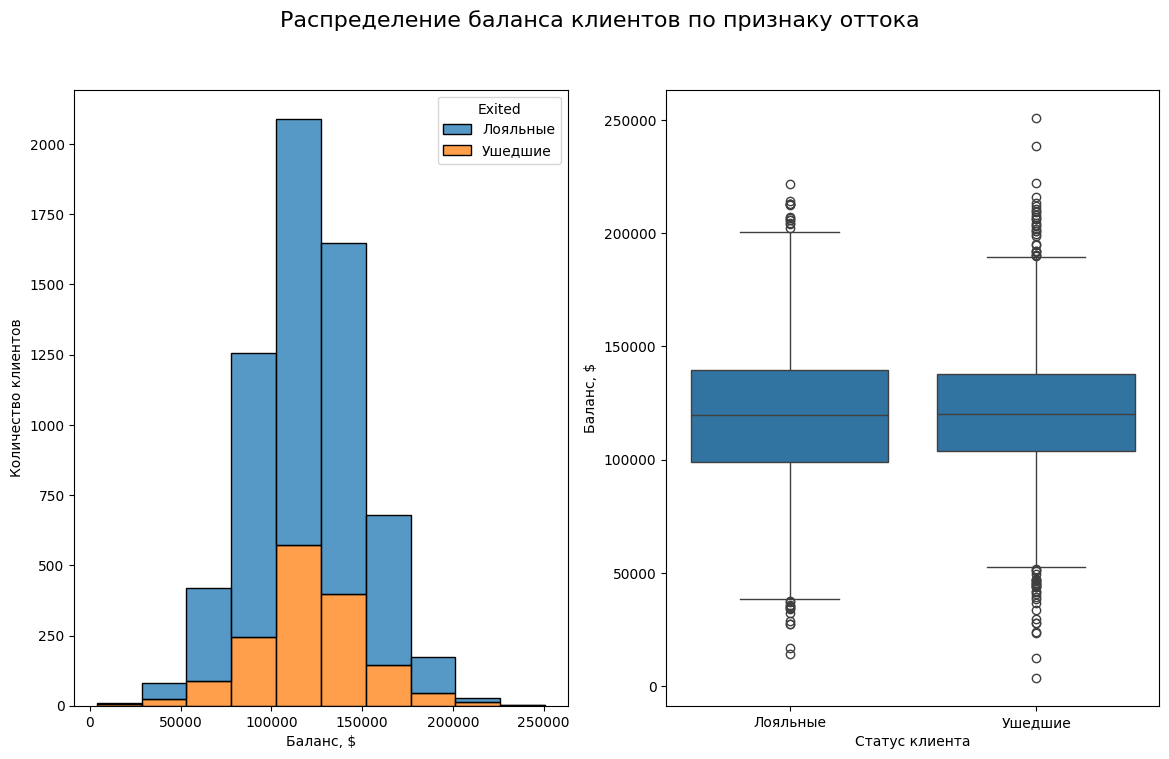

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

filtered_copy = filtered.copy()
filtered_copy['Exited'] = filtered_copy['Exited'].replace({0: "Лояльные", 1: "Ушедшие"})

sns.histplot(data=filtered_copy, x='Balance', bins=10, hue='Exited', multiple="stack", ax=ax1)
ax1.set_xlabel('Баланс, $')
ax1.set_ylabel('Количество клиентов')

sns.boxplot(data=filtered_copy, x='Exited', y='Balance', ax=ax2)
ax2.set_xlabel('Статус клиента')
ax2.set_ylabel('Баланс, $')

plt.suptitle('Распределение баланса клиентов по признаку оттока', fontsize=16)

plt.show()

У ушедших клиентов квартили находятся ближе к медиание, также у данных клиентов значительно больше выбросов. Возможно, ушедшие клиенты недовольны условиями хранения сбережений

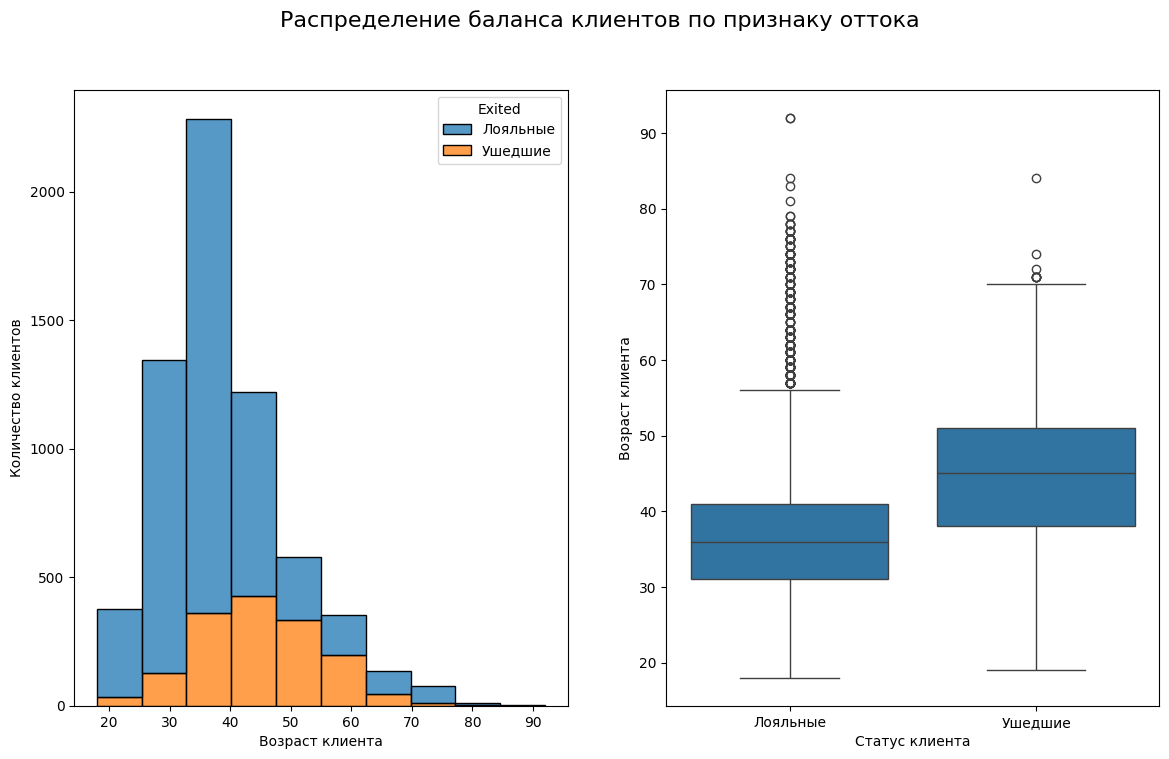

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

sns.histplot(data=filtered_copy, x='Age', bins=10, hue='Exited', multiple="stack", ax=ax1)
ax1.set_xlabel('Возраст клиента')
ax1.set_ylabel('Количество клиентов')

sns.boxplot(data=filtered_copy, x='Exited', y='Age', ax=ax2)
ax2.set_xlabel('Статус клиента')
ax2.set_ylabel('Возраст клиента')

plt.suptitle('Распределение баланса клиентов по признаку оттока', fontsize=16)

plt.show()

Большая часть клиентов - лица возрастом от 30 до 53 лет. У лояльных клиентов больше выбросов, чем у ушедших. Необходимо обратить внимание на возрастную категорию лиц с возрастом 36-53. Именно в данной категории произошел наибольший отток клиентов.

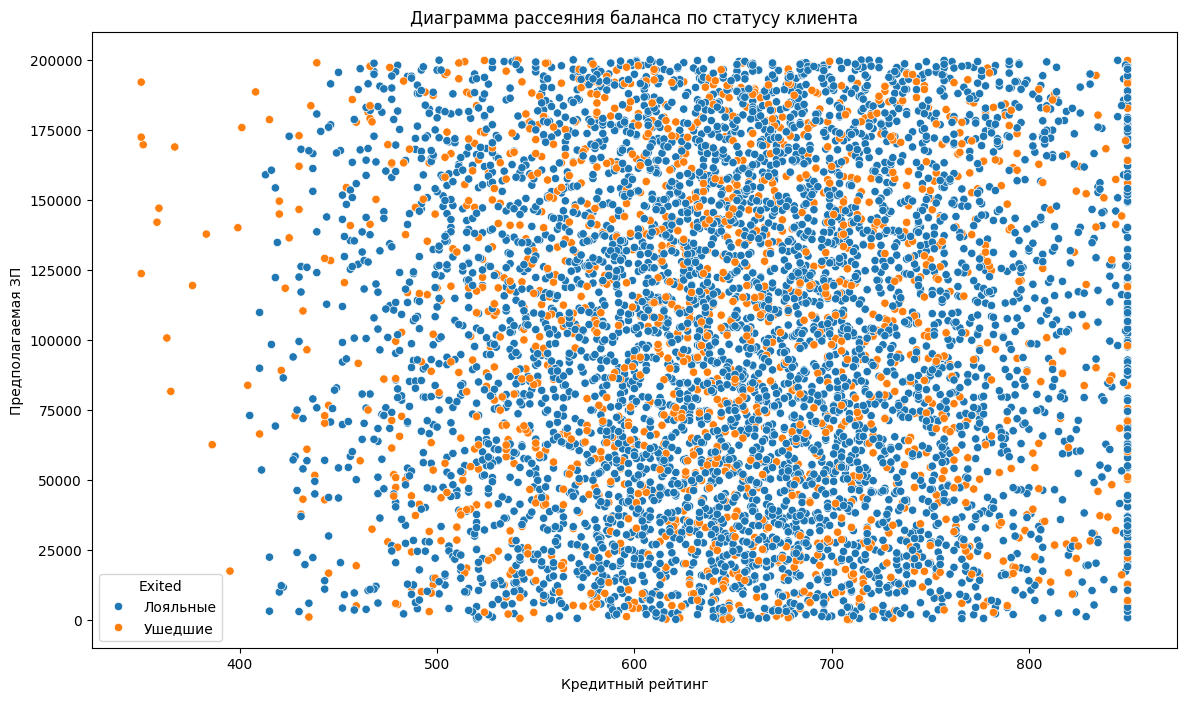

In [6]:

df = filtered_copy.copy()

df['CreditScore'] = np.log1p(df['CreditScore'])
df['EstimatedSalary'] = np.log1p(df['EstimatedSalary'])

plt.figure(figsize=(14, 8))
sns.scatterplot(data=filtered_copy, x='CreditScore', y='EstimatedSalary', hue='Exited')
plt.title('Диаграмма рассеяния баланса по статусу клиента')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Предполагаемая ЗП')

plt.show()

Никаких зависимостей не наблюдаю.

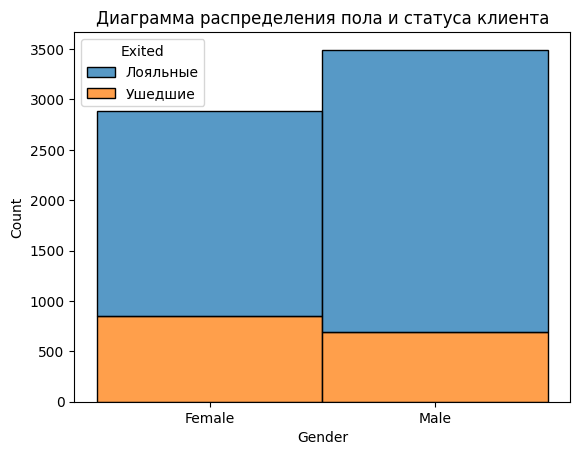

In [7]:
sns.histplot(data=filtered_copy, x='Gender', hue='Exited', multiple="stack")
plt.title('Диаграмма распределения пола и статуса клиента')
plt.show()

Из данной диагрммы видно, что женщины уходят чаще мужчин, при том что клиентов мужчин больше.

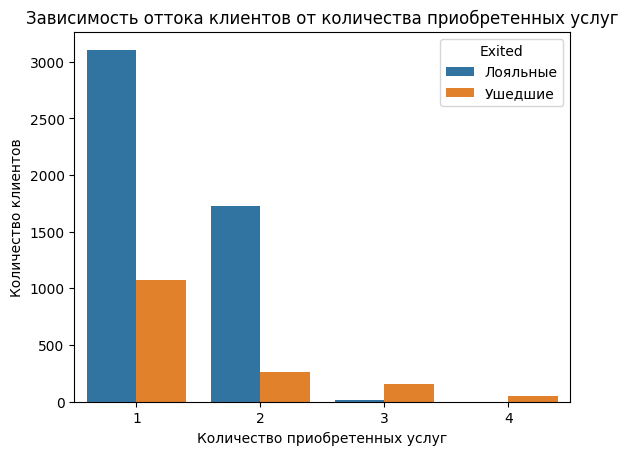

In [8]:
sns.countplot(data=filtered_copy, x='NumOfProducts', hue='Exited')
plt.title('Зависимость оттока клиентов от количества приобретенных услуг')
plt.xlabel("Количество приобретенных услуг")
plt.ylabel("Количество клиентов")
plt.show()

Клиенты, кторые приобретают мало услуг, уходят чаще.

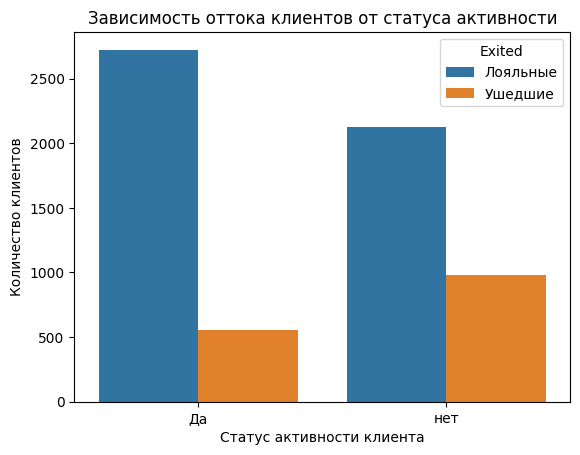

In [9]:
df = filtered_copy.copy()
df['IsActiveMember'] = df['IsActiveMember'].replace({0: "нет", 1: "Да"})
sns.countplot(data=df, x='IsActiveMember', hue='Exited')
plt.title('Зависимость оттока клиентов от статуса активности')
plt.xlabel("Статус активности клиента")
plt.ylabel("Количество клиентов")
plt.show()

Клиенты, имеющие статус активности, покидают банк реже. Перевод клиентов из неактивных в статус активных может снизить отток клиентов.

In [10]:
grouped = filtered[filtered['Exited'] == 1].groupby(by='Geography')
grouped = grouped['Exited'].count().reset_index()

fig = px.choropleth(
    data_frame=grouped, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    title='Карта ушедших клиентов в разных странах', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

fig.show()

Банк покидали клиенты из 3-х стран: Германия, Испания Франция. Наибольший отток наблюдается в Германии. Происходит это из-за низкой лояльности (увидел [здесь](https://rpubs.com/EkaterinaTeterina/873033))

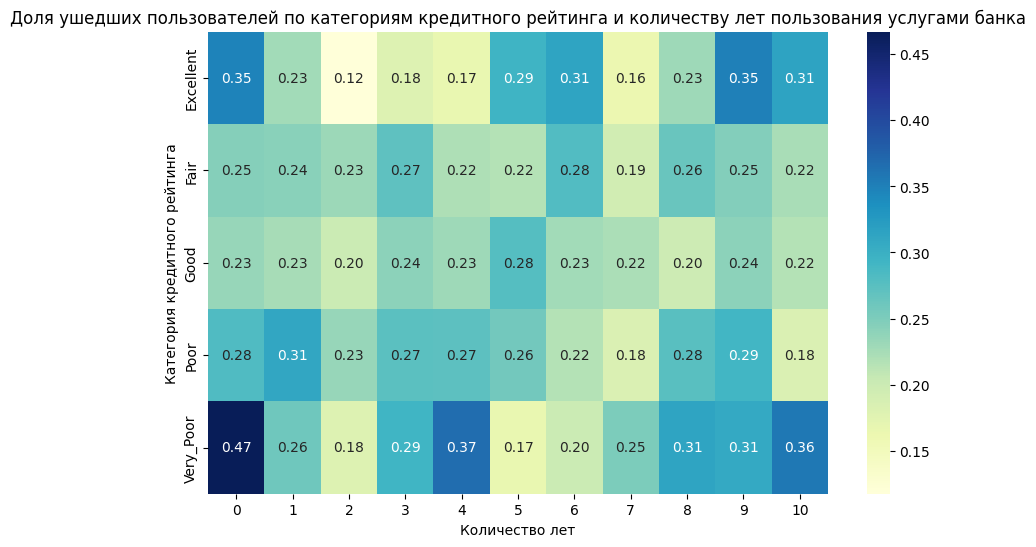

In [39]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

df = filtered.copy()
df['CreditScoreCat'] = df["CreditScore"].apply(get_credit_score_cat)
pivot = pd.pivot_table(df, index='CreditScoreCat', columns='Tenure', values='Exited', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Доля ушедших пользователей по категориям кредитного рейтинга и количеству лет пользования услугами банка')
plt.xlabel('Количество лет')
plt.ylabel('Категория кредитного рейтинга')
plt.show()

Чаще всего покидают банк клиенты с очень низким кредитным рейтингом (Very_Poor) и пользующие улугами банка меньше года. Затем идут клиенты с таким же крединтым рейтингом, срок использования услугами банка - 4года, а затем 10 лет.
Так же часто уходят клиенты с хорошей кредитной историей (Excellent), пользующиеся услугами банка до года и 9 лет.